<a href="https://colab.research.google.com/github/laxmivineelaparepalli/CapstoneProject/blob/main/UnbiasedMind_Identifying_and_Eliminating_Bias_in_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook demonstrates how to remove the bias using AI 360 fairness toolkit by adjusting the weights

In [ ]:
!pip install aif360
!pip install Pipeline_LabelEncoder-0.1.zip
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 6.4 MB/s eta 0:00:00
Processing ./Pipeline_LabelEncoder-0.1.zip
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/Pipeline_LabelEncoder-0.1.zip'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 5.3 MB/s eta 0:00:00


% of safe and risk for male and female

plot graphs to understand data distribution

Reweighing methodology

visualize the dataset

Use diversed datasets

the disparate impact ratio is the ratio of positive outcomes (Loan_Status=1) in the unprivileged group (in our case, females) divided by the ratio of positive outcomes in the privileged group (males). The AIF360 tool suggests that an acceptable lower bound is .8. That is, if the unprivileged group receives a positive outcome less than 80% of the time that the privileged group does, it is a disparate impact violation.

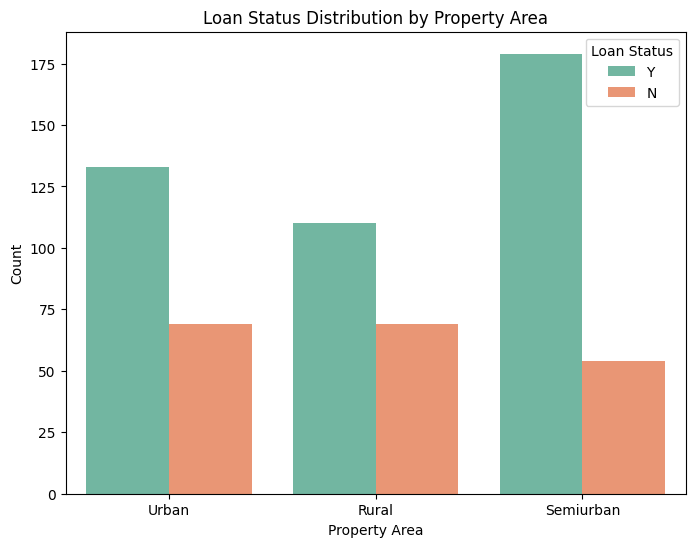

Count of applicants who meets guidelines: 475
Count of applicants who does not meet guidelines: 89
Count of applicants who meet guidelines and loan approved: 378
Count of applicants who do not meet guidelines and loan approved: 7
Number of approved applicants (loan_status = Y): 422
Percentage of approved applicants: 68.72964169381108 %
Number of rejected applicants (loan_status = N): 192
Percentage of approved applicants: 31.27035830618892 %
489
112
Male Count: 489
Male Percentage: 79.64169381107492 %

Female Count: 112
Female Percentage: 18.241042345276874 %
<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object

<Figure size 800x600 with 0 Axes>

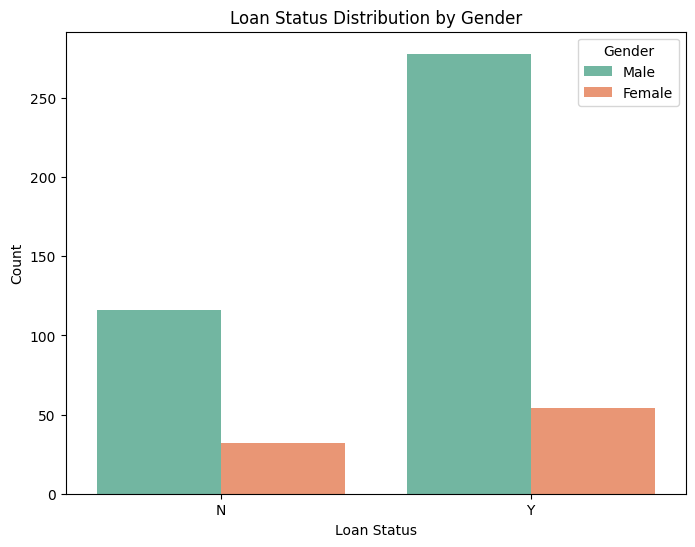

Number of priviliged (Males): 394
Number of unpriviliged (Females): 86
Number of unpriviliged (Females) who are rejected for loan: 32
Number of priviliged (Males) who are rejected for loan: 116
Percentage_f: 5.211726384364821
Percentage_m: 18.892508143322477
Number of unpriviliged (Females) who are approved for loan: 54
Number of priviliged (Males) who are approved for loan: 278
Percentage_f_app: 8.794788273615636
Percentage_m_app: 45.27687296416938
The ratio of the 'Number of unprivileged females who were approved for a loan' to the 'Total number of females (unprivileged)' is 0.627906976744186
The ratio of the 'Number of privileged males who were approved for a loan' to the 'Total number of males (privileged)' is 0.7055837563451777
Disparate Impact Ratio is 0.8899113267525515


In [ ]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
cred_df=pds.read_csv('/content/train_AV3.csv')


plt.figure(figsize=(8, 6))

# Count plot between Property_Area and Loan_Status, with hue as Gender
sns.countplot(x='Property_Area', data=cred_df, hue='Loan_Status', palette='Set2')
plt.title('Loan Status Distribution by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))






print(f"Count of applicants who meets guidelines: {cred_df['Credit_History'].value_counts()[1]}")
print(f"Count of applicants who does not meet guidelines: {cred_df['Credit_History'].value_counts()[0]}")
print(f"Count of applicants who meet guidelines and loan approved: {((cred_df['Credit_History']==1) & (cred_df['Loan_Status']=='Y')).sum()}")
print(f"Count of applicants who do not meet guidelines and loan approved: {((cred_df['Credit_History']==0) & (cred_df['Loan_Status']=='Y')).sum()}")
approved_count = cred_df['Loan_Status'][cred_df['Loan_Status'] == 'Y'].count()
total_count = len(cred_df)
approved_percentage = (approved_count / total_count) * 100
print("Number of approved applicants (loan_status = Y):", approved_count)
print("Percentage of approved applicants:", approved_percentage, "%")

rejected_count = cred_df['Loan_Status'][cred_df['Loan_Status'] == 'N'].count()
total_count = len(cred_df)
rejected_percentage = (rejected_count / total_count) * 100
print("Number of rejected applicants (loan_status = N):", rejected_count)
print("Percentage of approved applicants:", rejected_percentage, "%")


male_count = cred_df['Gender'][cred_df['Gender'] == 'Male'].count()
female_count = cred_df['Gender'][cred_df['Gender'] == 'Female'].count()

total_count = len(cred_df)
print(male_count)
male_percentage = (male_count / total_count) * 100
print(female_count)
female_percentage = (female_count / total_count) * 100

# Display results
print("Male Count:", male_count)
print("Male Percentage:", male_percentage, "%")
print("\nFemale Count:", female_count)
print("Female Percentage:", female_percentage, "%")

cred_df.describe(include='all')
cred_df.dropna(how='any',axis=0, inplace=True)
cred_df.info()
target_counts=cred_df['Loan_Status'].value_counts()
print(target_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=cred_df, hue='Gender', palette='Set2')
plt.title('Loan Status Distribution by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()



cred_df=cred_df.drop(['Loan_ID'],axis=1)
cred_df.loc[cred_df.Gender=='male','Gender']=1
cred_df.loc[cred_df.Gender=='female','Gender']=0
cred_df.loc[cred_df.Loan_Status=='Y','Loan_Status']=1
cred_df.loc[cred_df.Loan_Status=='N','Loan_Status']=0

categorical_columns=['Property_Area', 'Married', 'Dependents', 'Education', 'Self_Employed']

for columns in categorical_columns:
  oneHotEncoded=pds.get_dummies(cred_df[columns],prefix=columns)
  cred_df=cred_df.drop([columns],axis=1)
  cred_df=pds.concat([cred_df,oneHotEncoded],axis=1)

male_cred_df=cred_df[cred_df['Gender']=='Male']
priviliged=male_cred_df.shape[0]
print(f"Number of priviliged (Males): {priviliged}")
female_cred_df=cred_df[cred_df['Gender']=='Female']
unpriviliged=female_cred_df.shape[0]
print(f"Number of unpriviliged (Females): {unpriviliged}")

unpriviliged_data_rej=female_cred_df[female_cred_df['Loan_Status']==0].shape[0]
print(f"Number of unpriviliged (Females) who are rejected for loan: {unpriviliged_data_rej}")

priviliged_data_rej=male_cred_df[male_cred_df['Loan_Status']==0].shape[0]
print(f"Number of priviliged (Males) who are rejected for loan: {priviliged_data_rej}")

print(f"Percentage_f: {(unpriviliged_data_rej/total_count)*100}")
print(f"Percentage_m: {(priviliged_data_rej/total_count)*100}")

unpriviliged_data=female_cred_df[female_cred_df['Loan_Status']==1].shape[0]
print(f"Number of unpriviliged (Females) who are approved for loan: {unpriviliged_data}")

priviliged_data=male_cred_df[male_cred_df['Loan_Status']==1].shape[0]
print(f"Number of priviliged (Males) who are approved for loan: {priviliged_data}")

print(f"Percentage_f_app: {(unpriviliged_data/total_count)*100}")
print(f"Percentage_m_app: {(priviliged_data/total_count)*100}")

unpriviliged_data_ratio=unpriviliged_data/unpriviliged
print(f"The ratio of the 'Number of unprivileged females who were approved for a loan' to the 'Total number of females (unprivileged)' is {unpriviliged_data_ratio}")

priviliged_data_ratio=priviliged_data/priviliged
print(f"The ratio of the 'Number of privileged males who were approved for a loan' to the 'Total number of males (privileged)' is {priviliged_data_ratio}")

calc_disparate_impact=unpriviliged_data_ratio/priviliged_data_ratio
print(f"Disparate Impact Ratio is {calc_disparate_impact}")

if calc_disparate_impact<0.8:
  print("***Favours the privileged group***")
elif calc_disparate_impact==1:
  print("***No bias found***")
elif calc_disparate_impact>1:
  print("***Favours the unprivileged group***")


Selection Bias

In [ ]:
!pip install aif360[inFairness]
!pip install aif360[OptimalTransport]

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:


mean_income = cred_df['ApplicantIncome'].mean()
num_females_above_mean = cred_df[(cred_df['Gender'] == 'Female') & (cred_df['ApplicantIncome'] > mean_income)].shape[0]
print(f"Number of females with applicant income more than mean income: {num_females_above_mean}")

num_males_above_mean = cred_df[(cred_df['Gender'] == 'Male') & (cred_df['ApplicantIncome'] > mean_income)].shape[0]
print(f"Number of males with applicant income more than mean income: {num_males_above_mean}")

num_females_above_mean_loan_approved = cred_df[(cred_df['Gender'] == 'Female') & (cred_df['ApplicantIncome'] > mean_income) & (cred_df['Loan_Status']==1)].shape[0]
print(f"Number of females with applicant income more than mean income and loan approved: {num_females_above_mean_loan_approved}")

num_males_above_mean_loan_approved = cred_df[(cred_df['Gender'] == 'Male') & (cred_df['ApplicantIncome'] > mean_income) & (cred_df['Loan_Status']==1)].shape[0]
print(f"Number of males with applicant income more than mean income and loan approved: {num_males_above_mean_loan_approved}")

print(num_females_above_mean_loan_approved/num_females_above_mean)
print(num_males_above_mean_loan_approved/num_males_above_mean)
print(f"Disparate impact ratio: {(num_females_above_mean_loan_approved/num_females_above_mean)/(num_males_above_mean_loan_approved/num_males_above_mean)}")







Number of females with applicant income more than mean income: 18
Number of males with applicant income more than mean income: 126
Number of females with applicant income more than mean income and loan approved: 13
Number of males with applicant income more than mean income and loan approved: 86
0.7222222222222222
0.6825396825396826
Disparate impact ratio: 1.0581395348837208


Mitigating Bias using AIF360 to remove make desparate impact 1

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn import preprocessing
import pandas as pd


df = pd.read_csv('/content/train_AV3.csv')
df.dropna(how='any',axis=0, inplace=True)
df = df.drop(columns=['Loan_ID','Dependents','Property_Area'])
data_encoded = df.copy(deep=True)
lab_enc = preprocessing.LabelEncoder()
categorical_column = ['Gender', 'Married', 'Loan_Status', 'Education', 'Self_Employed']

for col in categorical_column:
    data_encoded[col] = lab_enc.fit_transform(df[col])

favorable_label = 1
unfavorable_label = 0
unprivileged_groups = [{'Gender': 0}]
privileged_groups = [{'Gender': 1}]

cred_dataset = BinaryLabelDataset(
    favorable_label=favorable_label,
    unfavorable_label=unfavorable_label,
    df=data_encoded,
    label_names=['Loan_Status'],
    protected_attribute_names=['Gender', 'Married']
)

RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(cred_dataset)
train_tf_dataset = RW.transform(cred_dataset)

metric_transformed_train = BinaryLabelDatasetMetric(train_tf_dataset,
                                                    unprivileged_groups=unprivileged_groups,
                                                    privileged_groups=privileged_groups)

disparate_impact_ratio = metric_transformed_train.disparate_impact()
print("Disparate Impact Ratio (after transformation):", disparate_impact_ratio)

# train_tf_df=train_tf_dataset.convert_to_dataframe()[0]

# unpriviliged_ratio=train_tf_df[(train_tf_df['Gender']==0) & (train_tf_df['Loan_Status']==1)].shape[0]/train_tf_df[train_tf_df['Gender']==0].shape[0]
# print(f"The ratio of the 'Number of unprivileged females who were approved for a loan' to the 'Total number of females (unprivileged)' is {unpriviliged_ratio}")
# priviliged_ratio=train_tf_df[(train_tf_df['Gender']==1) & (train_tf_df['Loan_Status']==1)].shape[0]/train_tf_df[train_tf_df['Gender']==1].shape[0]
# print(unpriviliged_ratio/priviliged_ratio)



Disparate Impact Ratio (after transformation): 1.0000000000000002


/usr/local/lib/python3.10/dist-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


In [ ]:
from sklearn.model_selection import train_test_split

Model Fitting

In [ ]:
cred_df=train_tf_dataset.convert_to_dataframe()[0]
x = cred_df.drop(['Loan_Status'], axis=1)
y = cred_df['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

Accuracy:  0.8125
Precision:  0.788235294117647
Recall:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")


True Positives (TP): 67
True Negatives (TN): 11
False Positives (FP): 18
False Negatives (FN): 0
True Positive Rate (TPR): 100.00%
False Positive Rate (FPR): 62.07%
True Negative Rate (TNR): 37.93%
False Negative Rate (FNR): 0.00%


Usecase 2
70k+ Job Applicants Data (Human Resource)

Total count: 73462
Count of Employed: 39392
Count of UnEmployed: 34070
Employed percentage: 53.62228090713567%
UnEmployed percentage: 46.37771909286434%
Count of Males: 68573
Count of Females: 3518
Count of NonBinary: 1371
Male percentage: 93.34485856633361%
Female percentage: 4.788870436416106%
NonBinary percentage: 1.866270997250279%
 Female Not Employed 1939
 Male Not Employed 31491
 Non Binary Not Employed 640
Number of employed females: 1579
Number of employed males: 37082
Number of employed NonBinary: 731
Percentage of employed females: 44.88%
Percentage of employed males: 54.08%
Percentage of employed NonBinary: 53.32%


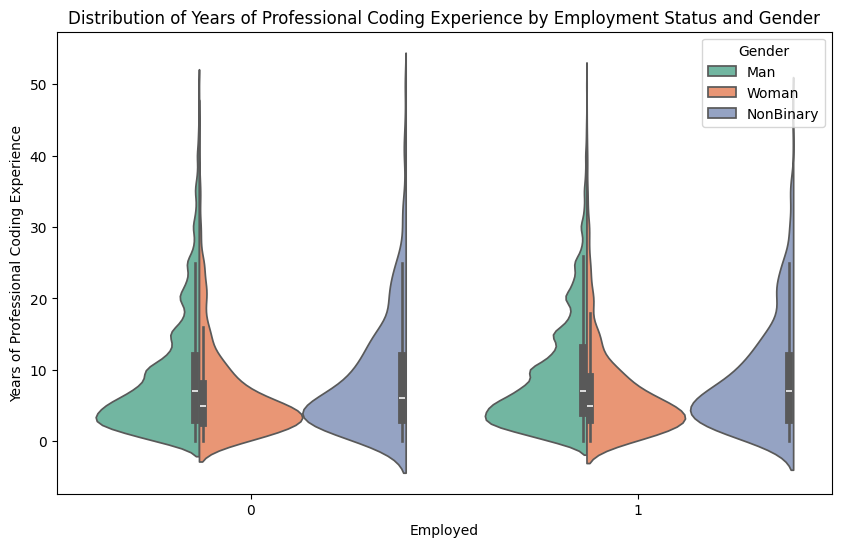

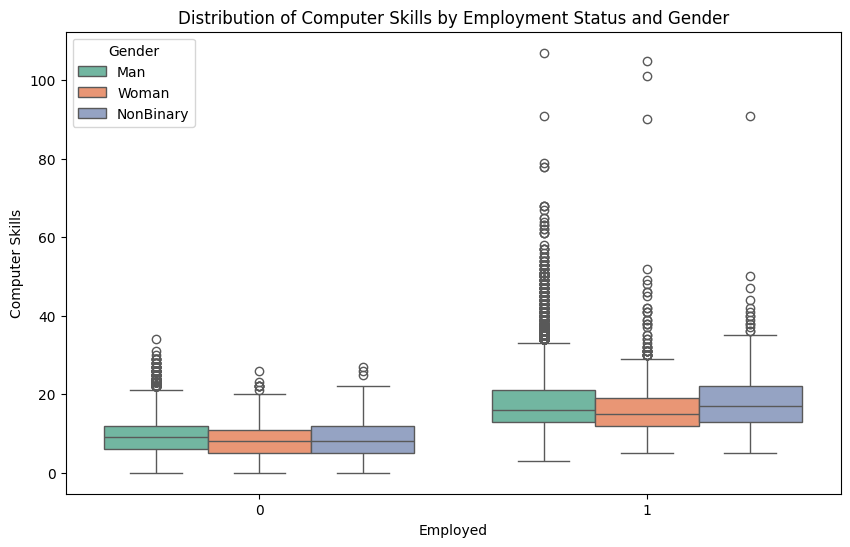

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 66877 to 12305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4994 non-null   int64  
 1   Age             4994 non-null   object 
 2   Accessibility   4994 non-null   object 
 3   EdLevel         4994 non-null   object 
 4   Employment      4994 non-null   int64  
 5   Gender          4994 non-null   object 
 6   MentalHealth    4994 non-null   object 
 7   MainBranch      4994 non-null   object 
 8   YearsCode       4994 non-null   int64  
 9   YearsCodePro    4994 non-null   int64  
 10  Country         4994 non-null   object 
 11  PreviousSalary  4994 non-null   float64
 12  HaveWorkedWith  4994 non-null   object 
 13  ComputerSkills  4994 non-null   int64  
 14  Employed        4994 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 624.2+ KB
Employed
1    2702
0    2292
Name: count, dtype: int64


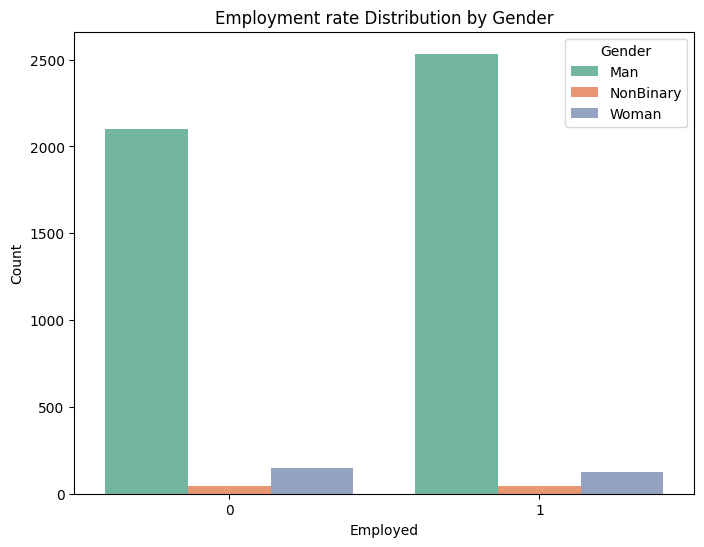

Number of priviliged (Males): 4633
Number of unpriviliged (Females): 272
Number of unpriviliged (Females) who are approved for loan: 126
Number of priviliged (Males) who are approved for loan: 2534
The ratio of the 'Number of unprivileged females who were approved for a loan' to the 'Total number of females (unprivileged)' is 0.4632352941176471
The ratio of the 'Number of privileged males who were approved for a loan' to the 'Total number of males (privileged)' is 0.5469458234405353
Disparate Impact Ratio is 0.8469491387715307


In [ ]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
Emp_df=pds.read_csv('/content/stackoverflow_full.csv')
print(f"Total count: {len(Emp_df)}")
print(f"Count of Employed: {(Emp_df['Employed'].value_counts()[1])}")
print(f"Count of UnEmployed: {(Emp_df['Employed'].value_counts()[0])}")
print(f"Employed percentage: {(Emp_df['Employed'].value_counts()[1]/len(Emp_df))*100}%")
print(f"UnEmployed percentage: {(Emp_df['Employed'].value_counts()[0]/len(Emp_df))*100}%")
print(f"Count of Males: {(Emp_df['Gender'].value_counts()['Man'])}")
print(f"Count of Females: {(Emp_df['Gender'].value_counts()['Woman'])}")
print(f"Count of NonBinary: {(Emp_df['Gender'].value_counts()['NonBinary'])}")
print(f"Male percentage: {(Emp_df['Gender'].value_counts()['Man']/len(Emp_df))*100}%")
print(f"Female percentage: {(Emp_df['Gender'].value_counts()['Woman']/len(Emp_df))*100}%")
print(f"NonBinary percentage: {(Emp_df['Gender'].value_counts()['NonBinary']/len(Emp_df))*100}%")


female_employed_df = Emp_df[(Emp_df['Gender'] == 'Woman') & (Emp_df['Employed'] == 1)]
male_employed_df = Emp_df[(Emp_df['Gender'] == 'Man') & (Emp_df['Employed'] == 1)]
nb_employed_df = Emp_df[(Emp_df['Gender'] == 'NonBinary') & (Emp_df['Employed'] == 1)]

print(f" Female Not Employed {(Emp_df[(Emp_df['Gender'] == 'Woman') & (Emp_df['Employed'] == 0)]).shape[0]}")
print(f" Male Not Employed {(Emp_df[(Emp_df['Gender'] == 'Man') & (Emp_df['Employed'] == 0)]).shape[0]}")
print(f" Non Binary Not Employed {(Emp_df[(Emp_df['Gender'] == 'NonBinary') & (Emp_df['Employed'] == 0)]).shape[0]}")

num_female_employed = len(female_employed_df)
num_male_employed = len(male_employed_df)
num_nb_employed = len(nb_employed_df)
percentage_male_employed = (num_male_employed / Emp_df['Gender'].value_counts()['Man']) * 100
percentage_female_employed = (num_female_employed / Emp_df['Gender'].value_counts()['Woman']) * 100
percentage_nb_employed = (num_nb_employed / Emp_df['Gender'].value_counts()['NonBinary']) * 100
print("Number of employed females:", num_female_employed)
print("Number of employed males:", num_male_employed)
print("Number of employed NonBinary:", num_nb_employed)
print("Percentage of employed females: {:.2f}%".format(percentage_female_employed))
print("Percentage of employed males: {:.2f}%".format(percentage_male_employed))
print("Percentage of employed NonBinary: {:.2f}%".format(percentage_nb_employed))

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to visualize the distribution of 'YearsCodePro' for employed and unemployed individuals
plt.figure(figsize=(10, 6))
sns.violinplot(x='Employed', y='YearsCodePro', data=Emp_df, hue='Gender', split=True, palette='Set2')
plt.title('Distribution of Years of Professional Coding Experience by Employment Status and Gender')
plt.xlabel('Employed')
plt.ylabel('Years of Professional Coding Experience')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the distribution of 'ComputerSkills' for employed and unemployed individuals
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employed', y='ComputerSkills', data=Emp_df, hue='Gender', palette='Set2')
plt.title('Distribution of Computer Skills by Employment Status and Gender')
plt.xlabel('Employed')
plt.ylabel('Computer Skills')
plt.show()



Emp_df = Emp_df.sample(n=5000, random_state=1)
Emp_df.describe(include='all')
Emp_df.dropna(how='any',axis=0, inplace=True)
Emp_df.info()
target_counts=Emp_df['Employed'].value_counts()
print(target_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Employed', data=Emp_df, hue='Gender', palette='Set2')
plt.title('Employment rate Distribution by Gender')
plt.xlabel('Employed')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()


Emp_df=Emp_df.drop(['Accessibility','MentalHealth'],axis=1)
Emp_df.loc[Emp_df.Gender=='Man','Gender']=1
Emp_df.loc[Emp_df.Gender=='Woman','Gender']=0
Emp_df.loc[Emp_df.Gender=='NonBinary','Gender']=2


categorical_columns=['Age', 'EdLevel', 'MainBranch', 'HaveWorkedWith', 'Country']

for columns in categorical_columns:
  oneHotEncoded=pds.get_dummies(Emp_df[columns],prefix=columns)
  Emp_df=Emp_df.drop([columns],axis=1)
  Emp_df=pds.concat([Emp_df,oneHotEncoded],axis=1)

male_emp_df=Emp_df[Emp_df['Gender']==1]
priviliged=male_emp_df.shape[0]
print(f"Number of priviliged (Males): {priviliged}")
female_emp_df=Emp_df[Emp_df['Gender']==0]
unpriviliged=female_emp_df.shape[0]
print(f"Number of unpriviliged (Females): {unpriviliged}")

unpriviliged_data=female_emp_df[female_emp_df['Employed']==1].shape[0]
print(f"Number of unpriviliged (Females) who are approved for loan: {unpriviliged_data}")

priviliged_data=male_emp_df[male_emp_df['Employed']==1].shape[0]
print(f"Number of priviliged (Males) who are approved for loan: {priviliged_data}")

unpriviliged_data_ratio=unpriviliged_data/unpriviliged
print(f"The ratio of the 'Number of unprivileged females who were approved for a loan' to the 'Total number of females (unprivileged)' is {unpriviliged_data_ratio}")

priviliged_data_ratio=priviliged_data/priviliged
print(f"The ratio of the 'Number of privileged males who were approved for a loan' to the 'Total number of males (privileged)' is {priviliged_data_ratio}")

calc_disparate_impact=unpriviliged_data_ratio/priviliged_data_ratio
print(f"Disparate Impact Ratio is {calc_disparate_impact}")

if calc_disparate_impact<0.8:
  print("***Favours the privileged group***")
elif calc_disparate_impact==1:
  print("***No bias found***")
elif calc_disparate_impact>1:
  print("***Favours the unprivileged group***")


Fitting Model and slicing on raw data

In [ ]:
x = Emp_df.drop(['Employed'], axis=1)
y = Emp_df['Employed']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print(len(x_test))
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")


####Unprivileged
x_test_up = x_test.loc[x_test['Gender'] == 0]
y_test_up = y_test.loc[x_test_up.index]
if not x_test_up.empty:
    y_pred_up = model.predict(x_test_up)
    print("Unprivileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_up, y_pred_up))
    print("Precision: ", metrics.precision_score(y_test_up, y_pred_up))
    print("Recall: ", metrics.recall_score(y_test_up, y_pred_up))
else:
    print("No samples found for the unprivileged group.")

    conf_matrix = confusion_matrix(y_test_up, y_pred_up)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

print(len(x_test_up))

####Privileged
x_test_p = x_test.loc[x_test['Gender'] == 1]
y_test_p = y_test.loc[x_test_p.index]
if not x_test_p.empty:
    y_pred_p = model.predict(x_test_p)
    print("Privileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_p, y_pred_p))
    print("Precision: ", metrics.precision_score(y_test_p, y_pred_p))
    print("Recall: ", metrics.recall_score(y_test_p, y_pred_p))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_p, y_pred_p)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")


Accuracy:  0.7647647647647647
Precision:  0.8052434456928839
Recall:  0.7664884135472371
999
True Positives (TP): 430
True Negatives (TN): 334
False Positives (FP): 104
False Negatives (FN): 131
True Positive Rate (TPR): 76.65%
False Positive Rate (FPR): 23.74%
True Negative Rate (TNR): 76.26%
False Negative Rate (FNR): 23.35%
Unprivileged Group Metrics:
Accuracy:  0.7096774193548387
Precision:  0.6216216216216216
Recall:  0.8518518518518519
True Positives (TP): 430
True Negatives (TN): 334
False Positives (FP): 104
False Negatives (FN): 131
True Positive Rate (TPR): 76.65%
False Positive Rate (FPR): 23.74%
True Negative Rate (TNR): 76.26%
False Negative Rate (FNR): 23.35%
62
Privileged Group Metrics:
Accuracy:  0.7678185745140389
Precision:  0.8167006109979633
Recall:  0.7623574144486692
True Positives (TP): 401
True Negatives (TN): 310
False Positives (FP): 90
False Negatives (FN): 125
True Positive Rate (TPR): 76.24%
False Positive Rate (FPR): 22.50%
True Negative Rate (TNR): 77.50%

Checking if there is selection bias

In [ ]:
mean_YearsCode = Emp_df['YearsCode'].mean()
mean_ComputerSkills = Emp_df['ComputerSkills'].mean()
print(mean_YearsCode)
print(mean_ComputerSkills)
num_females_above_mean = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['ComputerSkills']>mean_ComputerSkills)].shape[0]
print(f"Number of females with applicant income more than mean income: {num_females_above_mean}")

num_males_above_mean = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['ComputerSkills']>mean_ComputerSkills)].shape[0]
print(f"Number of males with applicant income more than mean income: {num_males_above_mean}")

num_females_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['ComputerSkills']>mean_ComputerSkills) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of females with applicant income more than mean income and loan approved: {num_females_above_mean_loan_approved}")

num_males_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['ComputerSkills']>mean_ComputerSkills) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of males with applicant income more than mean income and loan approved: {num_males_above_mean_loan_approved}")

print(num_females_above_mean_loan_approved/num_females_above_mean)
print(num_males_above_mean_loan_approved/num_males_above_mean)
print((num_females_above_mean_loan_approved/num_females_above_mean)/(num_males_above_mean_loan_approved/num_males_above_mean))


14.446535843011613
13.535642771325591
Number of females with applicant income more than mean income: 17
Number of males with applicant income more than mean income: 834
Number of females with applicant income more than mean income and loan approved: 13
Number of males with applicant income more than mean income and loan approved: 694
0.7647058823529411
0.8321342925659473
0.9189693168333615


In [ ]:
mean_YearsCode = Emp_df['YearsCode'].mean()
mean_ComputerSkills = Emp_df['ComputerSkills'].mean()
print(mean_YearsCode)
print(mean_ComputerSkills)
num_females_above_mean = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['ComputerSkills']>mean_ComputerSkills)].shape[0]
print(f"Number of females with applicant income more than mean income: {num_females_above_mean}")

num_males_above_mean = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['ComputerSkills']>mean_ComputerSkills)].shape[0]
print(f"Number of males with applicant income more than mean income: {num_males_above_mean}")

num_females_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['ComputerSkills']>mean_ComputerSkills) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of females with applicant income more than mean income and loan approved: {num_females_above_mean_loan_approved}")

num_males_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['ComputerSkills']>mean_ComputerSkills) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of males with applicant income more than mean income and loan approved: {num_males_above_mean_loan_approved}")

print(num_females_above_mean_loan_approved/num_females_above_mean)
print(num_males_above_mean_loan_approved/num_males_above_mean)
print((num_females_above_mean_loan_approved/num_females_above_mean)/(num_males_above_mean_loan_approved/num_males_above_mean))

14.446535843011613
13.535642771325591
Number of females with applicant income more than mean income: 91
Number of males with applicant income more than mean income: 2111
Number of females with applicant income more than mean income and loan approved: 74
Number of males with applicant income more than mean income and loan approved: 1781
0.8131868131868132
0.8436759829464708
0.9638615174830785


In [ ]:
mean_YearsCode = Emp_df['YearsCode'].mean()
mean_ComputerSkills = Emp_df['ComputerSkills'].mean()
print(mean_YearsCode)
print(mean_ComputerSkills)
num_females_above_mean = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['YearsCode'] > mean_YearsCode)].shape[0]
print(f"Number of females with applicant income more than mean income: {num_females_above_mean}")

num_males_above_mean = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['YearsCode'] > mean_YearsCode)].shape[0]
print(f"Number of males with applicant income more than mean income: {num_males_above_mean}")

num_females_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 0) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of females with applicant income more than mean income and loan approved: {num_females_above_mean_loan_approved}")

num_males_above_mean_loan_approved = Emp_df[(Emp_df['Gender'] == 1) & (Emp_df['YearsCode'] > mean_YearsCode) & (Emp_df['Employed']==1)].shape[0]
print(f"Number of males with applicant income more than mean income and loan approved: {num_males_above_mean_loan_approved}")

print(num_females_above_mean_loan_approved/num_females_above_mean)
print(num_males_above_mean_loan_approved/num_males_above_mean)
print((num_females_above_mean_loan_approved/num_females_above_mean)/(num_males_above_mean_loan_approved/num_males_above_mean))


14.446535843011613
13.535642771325591
Number of females with applicant income more than mean income: 68
Number of males with applicant income more than mean income: 1880
Number of females with applicant income more than mean income and loan approved: 30
Number of males with applicant income more than mean income and loan approved: 1001
0.4411764705882353
0.5324468085106383
0.828583181524358


Applying AIF360 and checking disparate impact ratio on transformed data

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn import preprocessing
import pandas as pd

data_encoded = Emp_df.copy(deep=True)

data_encoded.loc[data_encoded['Employed'] == 'Yes', 'Employed'] = 1
data_encoded.loc[data_encoded['Employed'] == 'No', 'Employed'] = 0
data_encoded.loc[data_encoded['Gender'] == 'Man', 'Gender'] = 1
data_encoded.loc[data_encoded['Gender'] == 'Woman', 'Gender'] = 0
data_encoded.loc[data_encoded['Gender'] == 'NonBinary', 'Gender'] = 2
favorable_label = 1
unfavorable_label = 0
unprivileged_groups = [{'Gender': 0}]
privileged_groups = [{'Gender': 1}]

cred_dataset = BinaryLabelDataset(
    favorable_label=favorable_label,
    unfavorable_label=unfavorable_label,
    df=data_encoded,
    label_names=['Employed'],
    protected_attribute_names=['Gender']
)


RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(cred_dataset)
train_tf_dataset = RW.transform(cred_dataset)

metric_transformed_train = BinaryLabelDatasetMetric(train_tf_dataset,
                                                    unprivileged_groups=unprivileged_groups,
                                                    privileged_groups=privileged_groups)


disparate_impact_ratio = metric_transformed_train.disparate_impact()
print("Disparate Impact Ratio (after transformation):", disparate_impact_ratio)








Disparate Impact Ratio (after transformation): 1.0000000000000004


Fitting model and checking accuracies for different groups on transformed data

In [ ]:
from sklearn.preprocessing import StandardScaler
transformed = train_tf_dataset.convert_to_dataframe()[0]
x_trans = transformed.drop(['Employed'], axis = 1)
y_trans = transformed['Employed']
scaler = StandardScaler()
data_std = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y_trans, test_size=0.2, random_state = 0)

model.fit(x_trans_train, y_trans_train)
y_trans_pred=model.predict(x_trans_test)
print("Accuracy: ", metrics.accuracy_score(y_trans_test,y_trans_pred))
print("Precision: ", metrics.precision_score(y_trans_test,y_trans_pred))
print("Recall: ", metrics.recall_score(y_trans_test,y_trans_pred))
print(len(x_trans_test))
print(len(y_trans_test))
conf_matrix = confusion_matrix(y_trans_test, y_trans_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

####Unprivileged
x_test_up = x_trans_test.loc[x_trans_test['Gender'] == 0]
y_test_up = y_trans_test.loc[x_test_up.index]
print(len(x_test_up))
print(len(y_test_up))
if not x_test_up.empty:
    y_pred_up = model.predict(x_test_up)
    print("Unprivileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_up, y_pred_up))
    print("Precision: ", metrics.precision_score(y_test_up, y_pred_up))
    print("Recall: ", metrics.recall_score(y_test_up, y_pred_up))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_up, y_pred_up)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

####Privileged
x_test_p = x_trans_test.loc[x_trans_test['Gender'] == 1]
y_test_p = y_trans_test.loc[x_test_p.index]
if not x_test_p.empty:
    y_pred_p = model.predict(x_test_p)
    print("Privileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_p, y_pred_p))
    print("Precision: ", metrics.precision_score(y_test_p, y_pred_p))
    print("Recall: ", metrics.recall_score(y_test_p, y_pred_p))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_p, y_pred_p)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")



Accuracy:  0.7737737737737738
Precision:  0.8
Recall:  0.7637051039697542
999
999
True Positives (TP): 404
True Negatives (TN): 369
False Positives (FP): 101
False Negatives (FN): 125
True Positive Rate (TPR): 76.37%
False Positive Rate (FPR): 21.49%
True Negative Rate (TNR): 78.51%
False Negative Rate (FNR): 23.63%
55
55
Unprivileged Group Metrics:
Accuracy:  0.8181818181818182
Precision:  0.7777777777777778
Recall:  0.84
True Positives (TP): 21
True Negatives (TN): 24
False Positives (FP): 6
False Negatives (FN): 4
True Positive Rate (TPR): 84.00%
False Positive Rate (FPR): 20.00%
True Negative Rate (TNR): 80.00%
False Negative Rate (FNR): 16.00%
Privileged Group Metrics:
Accuracy:  0.7730727470141151
Precision:  0.8017057569296375
Recall:  0.7642276422764228
True Positives (TP): 376
True Negatives (TN): 336
False Positives (FP): 93
False Negatives (FN): 116
True Positive Rate (TPR): 76.42%
False Positive Rate (FPR): 21.68%
True Negative Rate (TNR): 78.32%
False Negative Rate (FNR): 

Usecase 3 - COMPAS

18316
15201
Total count: 18316
Male Count: 12324
Male Percentage: 67.28543350076436 %

Female Count: 2877
Female Percentage: 15.707578073815242 %
African-American Count: 9419
African-American Percentage: 51.42498362087792 %

Caucasian Count: 5782
Caucasian Percentage: 31.568027953701684 %

Race: African-American
  Male Count: 7947
  Male Percentage: 43.39%
  Female Count: 1472
  Female Percentage: 8.04%

Race: Caucasian
  Male Count: 4377
  Male Percentage: 23.90%
  Female Count: 1405
  Female Percentage: 7.67%


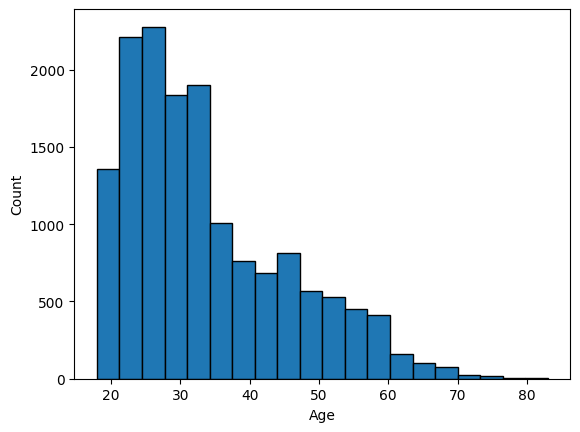

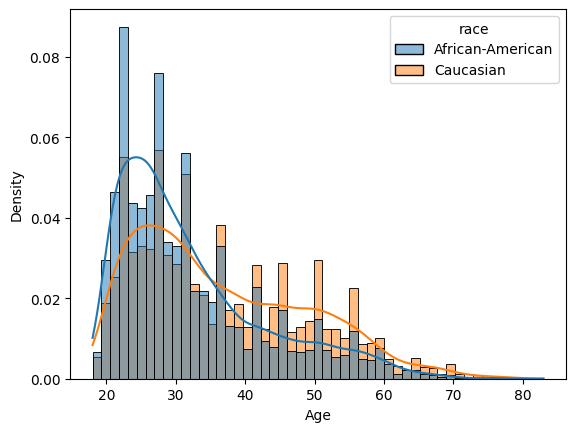

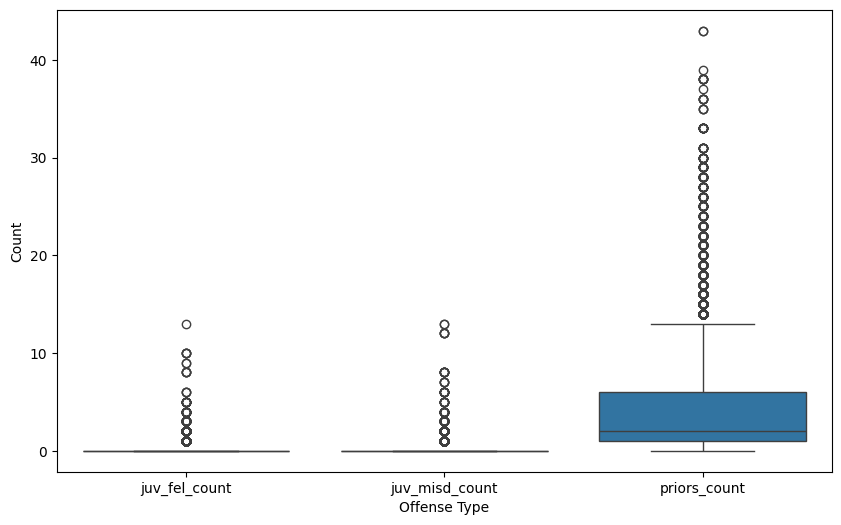

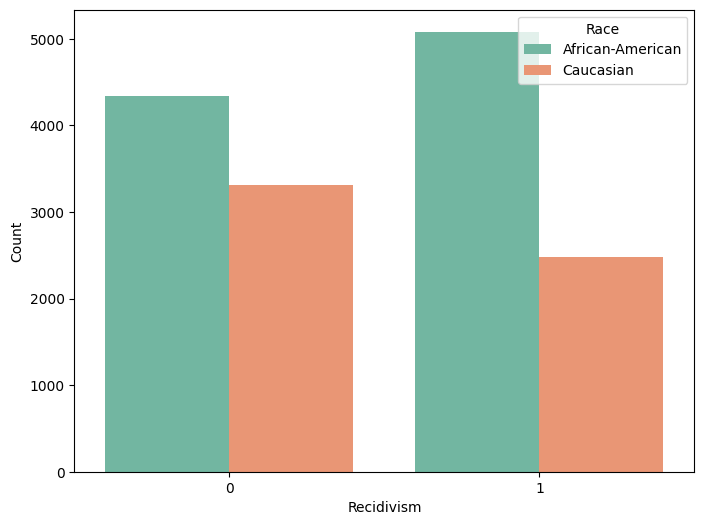

<class 'pandas.core.frame.DataFrame'>
Index: 15151 entries, 3 to 18313
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              15151 non-null  int64 
 1   race             15151 non-null  object
 2   sex              15151 non-null  object
 3   c_charge_degree  15151 non-null  object
 4   c_charge_desc    15151 non-null  object
 5   juv_fel_count    15151 non-null  int64 
 6   juv_misd_count   15151 non-null  int64 
 7   priors_count     15151 non-null  int64 
 8   is_recid         15151 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB
is_recid
0    7631
1    7520
Name: count, dtype: int64


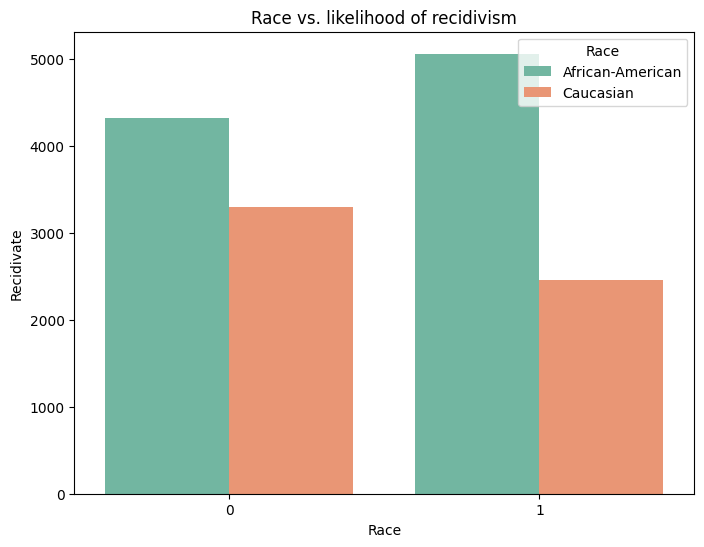

Number of priviliged (Caucasian): 5757
Number of unpriviliged (African-American): 9394
Number of unprivileged individuals (African-American) accused of recidivism: 4329
Number of privileged individuals (Caucasian) accused of recidivism: 3302
The ratio of the 'Number of unprivileged individuals (African-American) accused of recidivism' to the 'Total number of unpriviliged (African-American)' is 0.46082605918671493
The ratio of the 'Number of privileged individuals (Caucasian) accused of recidivism' to the 'Total number of priviliged (Caucasian)' is 0.5735626194198368
Disparate Impact Ratio is 0.8034450704839242


In [ ]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
compas_data = pds.read_csv('/content/cox-violent-parsed.csv')
total_count = len(compas_data)
print(total_count)
columns_to_keep = ['age', 'race', 'sex', 'c_charge_degree', 'c_charge_desc',
                   'juv_fel_count', 'juv_misd_count', 'priors_count', 'is_recid']
compas_data = compas_data[columns_to_keep]
compas_data = compas_data[(compas_data['race'] == 'Caucasian') | (compas_data['race'] == 'African-American')]
compas_data = compas_data[compas_data['is_recid'] != -1]
total_count_2=len(compas_data)
print(total_count_2)
male_count = compas_data['sex'][compas_data['sex'] == 'Male'].count()
female_count = compas_data['sex'][compas_data['sex'] == 'Female'].count()
african_american_count = compas_data['race'][compas_data['race'] == 'African-American'].count()
caucasian_count = compas_data['race'][compas_data['race'] == 'Caucasian'].count()
african_american_percentage = (african_american_count / total_count) * 100
caucasian_percentage = (caucasian_count / total_count) * 100
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100
print(f"Total count: {total_count}")
print("Male Count:", male_count)
print("Male Percentage:", male_percentage, "%")
print("\nFemale Count:", female_count)
print("Female Percentage:", female_percentage, "%")
print("African-American Count:", african_american_count)
print("African-American Percentage:", african_american_percentage, "%")
print("\nCaucasian Count:", caucasian_count)
print("Caucasian Percentage:", caucasian_percentage, "%")
for race in compas_data['race'].unique():
    print(f"\nRace: {race}")
    for sex in compas_data['sex'].unique():
        count = compas_data[(compas_data['race'] == race) & (compas_data['sex'] == sex)].shape[0]
        percentage = (count / total_count) * 100
        print(f"  {sex} Count: {count}")
        print(f"  {sex} Percentage: {percentage:.2f}%")
# charge_desc_counts = compas_data['c_charge_desc'].value_counts()
# total_count = len(compas_data)
# charge_desc_percentages = (charge_desc_counts / total_count) * 100
# for desc, count in charge_desc_counts.items():
#     percentage = charge_desc_percentages[desc]
#     print(f"{desc}: Count = {count}, Percentage = {percentage:.2f}%")
# Create the histogram for age cat
plt.hist(compas_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.title('Distribution of Age')
plt.show()
# Plot the histogram for agexrace
sns.histplot(data=compas_data, x='age', hue='race', common_norm=False, stat='density', kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
#plt.title('Distribution of Age by Race')
plt.show()
# Plot the boxplot
compas_data_melted = compas_data.melt(value_vars=['juv_fel_count', 'juv_misd_count', 'priors_count'], var_name='Offense Type', value_name='Count')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Offense Type', y='Count', data=compas_data_melted)
#plt.title('Distribution of Offense Counts')
#plt.xlabel('Offense Type')
plt.ylabel('Count')
plt.show()
# Plot the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='is_recid', data=compas_data, hue='race', palette='Set2')
#plt.title('Recidivism Distribution by Race')
plt.xlabel('Recidivism')
plt.ylabel('Count')
plt.legend(title='Race', loc='upper right')
plt.show()

compas_data.describe(include='all')
compas_data.dropna(how='any',axis=0, inplace=True)

compas_data_copy=compas_data.copy(deep=True)
compas_data.info()
target_counts=compas_data['is_recid'].value_counts()
print(target_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='is_recid', data=compas_data, hue='race', palette='Set2')
plt.title('Race vs. likelihood of recidivism')
plt.xlabel('Race')
plt.ylabel('Recidivate')
plt.legend(title='Race', loc='upper right')
plt.show()

compas_data.loc[compas_data.race=='Caucasian','race']=1
compas_data.loc[compas_data.race=='African-American','race']=0

priviliged=compas_data[compas_data['race']==1].shape[0]
print(f"Number of priviliged (Caucasian): {priviliged}")
unpriviliged=compas_data[compas_data['race']==0].shape[0]
print(f"Number of unpriviliged (African-American): {unpriviliged}")

unpriviliged_data=compas_data[(compas_data['is_recid']==0)&(compas_data['race']==0)].shape[0]
print(f"Number of unprivileged individuals (African-American) accused of recidivism: {unpriviliged_data}")

priviliged_data=compas_data[(compas_data['is_recid']==0)&(compas_data['race']==1)].shape[0]
print(f"Number of privileged individuals (Caucasian) accused of recidivism: {priviliged_data}")

unpriviliged_data_ratio=unpriviliged_data/unpriviliged
print(f"The ratio of the 'Number of unprivileged individuals (African-American) accused of recidivism' to the 'Total number of unpriviliged (African-American)' is {unpriviliged_data_ratio}")

priviliged_data_ratio=priviliged_data/priviliged
print(f"The ratio of the 'Number of privileged individuals (Caucasian) accused of recidivism' to the 'Total number of priviliged (Caucasian)' is {priviliged_data_ratio}")

calc_disparate_impact=unpriviliged_data_ratio/priviliged_data_ratio
print(f"Disparate Impact Ratio is {calc_disparate_impact}")

if calc_disparate_impact<0.8:
  print("***Favours the privileged group***")
elif calc_disparate_impact==1:
  print("***No bias found***")
elif calc_disparate_impact>1:
  print("***Favours the unprivileged group***")


Model fitting and slicing on raw data before transformation

In [ ]:
categorical_columns=['c_charge_degree', 'c_charge_desc','sex']

for feature in categorical_columns:
    onehot = pds.get_dummies(compas_data[feature], prefix=feature)
    compas_data = compas_data.drop(feature, axis=1)
    compas_data = compas_data.join(onehot)

x = compas_data.drop(['is_recid'], axis=1)
y = compas_data['is_recid']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(x)
x = pds.DataFrame(data_std, columns=x.columns)
#We will follow an 80-20 split pattern for our training and test data, respectively
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 171)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

####Unprivileged
x_test_up = x_test.loc[x_test['race'] <= 0]
y_test_up = y_test.reindex(x_test_up.index)
y_test_up = y_test_up.dropna()
x_test_up = x_test_up.loc[y_test_up.index]
if not x_test_up.empty:
    y_pred_up = model.predict(x_test_up)
    print("Unprivileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_up, y_pred_up))
    print("Precision: ", metrics.precision_score(y_test_up, y_pred_up))
    print("Recall: ", metrics.recall_score(y_test_up, y_pred_up))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_up, y_pred_up)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

####Privileged

x_test_p = x_test[x_test['race'] >= 1]
y_test_p = y_test.reindex(x_test_p.index)
y_test_p = y_test_p.dropna()
x_test_p = x_test_p.loc[y_test_p.index]
if not x_test_p.empty:
    y_pred_p = model.predict(x_test_p)
    print("Privileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_p, y_pred_p))
    print("Precision: ", metrics.precision_score(y_test_p, y_pred_p))
    print("Recall: ", metrics.recall_score(y_test_p, y_pred_p))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_p, y_pred_p)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

Accuracy:  0.6628175519630485
Precision:  0.6566265060240963
Recall:  0.6583892617449665
True Positives (TP): 981
True Negatives (TN): 1028
False Positives (FP): 513
False Negatives (FN): 509
True Positive Rate (TPR): 65.84%
False Positive Rate (FPR): 33.29%
True Negative Rate (TNR): 66.71%
False Negative Rate (FNR): 34.16%
Unprivileged Group Metrics:
Accuracy:  0.47750865051903113
Precision:  0.47530864197530864
Recall:  0.5384615384615384
True Positives (TP): 77
True Negatives (TN): 61
False Positives (FP): 85
False Negatives (FN): 66
True Positive Rate (TPR): 53.85%
False Positive Rate (FPR): 58.22%
True Negative Rate (TNR): 41.78%
False Negative Rate (FNR): 46.15%
Privileged Group Metrics:
Accuracy:  0.5391304347826087
Precision:  0.52
Recall:  0.3577981651376147
True Positives (TP): 39
True Negatives (TN): 85
False Positives (FP): 36
False Negatives (FN): 70
True Positive Rate (TPR): 35.78%
False Positive Rate (FPR): 29.75%
True Negative Rate (TNR): 70.25%
False Negative Rate (FNR

Selection Bias

In [ ]:
mean_priors_count = compas_data_copy['priors_count'].mean()
print(mean_priors_count)
num_AM_below_mean = compas_data_copy[(compas_data_copy['race'] == 'African-American') & (compas_data_copy['priors_count'] < mean_priors_count)].shape[0]
print(f"Number of African-Americans with low number of prior offenses: {num_AM_below_mean}")

num_cc_below_mean = compas_data_copy[(compas_data_copy['race'] == 'Caucasian') & (compas_data_copy['priors_count'] < mean_priors_count)].shape[0]
print(f"Number of Caucasians with low number of prior offenses: {num_cc_below_mean}")

num_AM_below_mean_recid = compas_data_copy[(compas_data_copy['race'] == 'African-American') & (compas_data_copy['priors_count'] < mean_priors_count) & (compas_data_copy['is_recid']==0)].shape[0]
print(f"Number of African-Americans with low number of prior offenses and accused of no recidivism ': {num_AM_below_mean_recid}")

num_cc_below_mean_recid = compas_data_copy[(compas_data_copy['race'] == 'Caucasian') & (compas_data_copy['priors_count'] < mean_priors_count) & (compas_data_copy['is_recid']==0)].shape[0]
print(f"Number of Caucasians with low number of prior offenses and accused of no recidivism ': {num_cc_below_mean_recid}")

print(num_AM_below_mean_recid/num_AM_below_mean)
print(num_cc_below_mean_recid/num_cc_below_mean)
print((num_AM_below_mean_recid/num_AM_below_mean)/(num_cc_below_mean_recid/num_cc_below_mean))


4.355752095571249
Number of African-Americans with low number of prior offenses: 5745
Number of Caucasians with low number of prior offenses: 4424
Number of African-Americans with low number of prior offenses and accused of no recidivism ': 3141
Number of Caucasians with low number of prior offenses and accused of no recidivism ': 2777
0.5467362924281984
0.6277124773960217
0.8709979682039432


Applying AIF360

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn import preprocessing
import pandas as pd

data_encoded = compas_data.copy(deep=True)

favorable_label = 1
unfavorable_label = 0
unprivileged_groups = [{'race': 0}]
privileged_groups = [{'race': 1}]

compas_dataset = BinaryLabelDataset(
    favorable_label=favorable_label,
    unfavorable_label=unfavorable_label,
    df=data_encoded,
    label_names=['is_recid'],
    protected_attribute_names=['race']
)


RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(compas_dataset)
train_tf_dataset = RW.transform(compas_dataset)

metric_transformed_train = BinaryLabelDatasetMetric(train_tf_dataset,
                                                    unprivileged_groups=unprivileged_groups,
                                                    privileged_groups=privileged_groups)


disparate_impact_ratio = metric_transformed_train.disparate_impact()
print("Disparate Impact Ratio (after transformation):", disparate_impact_ratio)



Disparate Impact Ratio (after transformation): 1.0000000000000004


Model fitting and slicing on transformed data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC

# Assuming `train_tf_dataset` is your transformed dataset
transformed = train_tf_dataset.convert_to_dataframe()[0]

# Keep 'race' column in x_t for filtering
x_t = transformed.drop(['is_recid'], axis=1)  # Do not drop 'race' here
y_t = transformed['is_recid']
race_t = transformed['race']  # Keep 'race' for filtering

# Standardize features (excluding 'race')
scaler = StandardScaler()
numerical_cols = x_t.select_dtypes(include=['number']).columns
x_t[numerical_cols] = scaler.fit_transform(x_t[numerical_cols])

# Train-test split
x_train_t, x_test_t, y_train_t, y_test_t, race_train_t, race_test_t = train_test_split(
    x_t, y_t, race_t, test_size=0.2, random_state=10
)  # Include 'race' in the split

# Logistic Regression model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(x_train_t.drop('race', axis=1), y_train_t)  # Drop 'race' before fitting
y_pred_t = model.predict(x_test_t.drop('race', axis=1))  # Drop 'race' before predicting

# Print model evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_test_t, y_pred_t))
print("Precision: ", metrics.precision_score(y_test_t, y_pred_t))
print("Recall: ", metrics.recall_score(y_test_t, y_pred_t))

conf_matrix = confusion_matrix(y_test_t, y_pred_t)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

#### Unprivileged

# Filter unprivileged group (e.g., 'race' <= 0)
x_test_t_up = x_test_t[race_test_t <= 0] # Use race_test_t for filtering
y_test_t_up = y_test_t.loc[x_test_t_up.index]
x_test_t_up = x_test_t_up.drop('race', axis=1).dropna()  # Drop 'race' after filtering
y_test_t_up = y_test_t_up.dropna()

# Check if there are samples for the unprivileged group
if not x_test_t_up.empty:
    y_pred_t_up = model.predict(x_test_t_up)
    print("Unprivileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_t_up, y_pred_t_up))
    print("Precision: ", metrics.precision_score(y_test_t_up, y_pred_t_up))
    print("Recall: ", metrics.recall_score(y_test_t_up, y_pred_t_up))
else:
    print("No samples found for the unprivileged group.")

conf_matrix = confusion_matrix(y_test_t_up, y_pred_t_up)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")

#### Privileged

# Filter privileged group (e.g., 'race' >= 1)
x_test_p = x_test_t[race_test_t >= 1]  # Use race_test_t for filtering
y_test_p = y_test_t.loc[x_test_p.index]
x_test_p = x_test_p.drop('race', axis=1).dropna()  # Drop 'race' after filtering
y_test_p = y_test_p.dropna()

# Check if there are samples for the privileged group
if not x_test_p.empty:
    y_pred_p = model.predict(x_test_p)
    print("Privileged Group Metrics:")
    print("Accuracy: ", metrics.accuracy_score(y_test_p, y_pred_p))
    print("Precision: ", metrics.precision_score(y_test_p, y_pred_p))
    print("Recall: ", metrics.recall_score(y_test_p, y_pred_p))
else:
    print("No samples found for the privileged group.")

conf_matrix = confusion_matrix(y_test_p, y_pred_p)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate TPR, FPR, TNR, FNR
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

# Print the counts
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print the percentages
print(f"True Positive Rate (TPR): {TPR:.2%}")
print(f"False Positive Rate (FPR): {FPR:.2%}")
print(f"True Negative Rate (TNR): {TNR:.2%}")
print(f"False Negative Rate (FNR): {FNR:.2%}")


Accuracy:  0.6575387660838007
Precision:  0.6489151873767258
Recall:  0.6619718309859155
True Positives (TP): 987
True Negatives (TN): 1006
False Positives (FP): 534
False Negatives (FN): 504
True Positive Rate (TPR): 66.20%
False Positive Rate (FPR): 34.68%
True Negative Rate (TNR): 65.32%
False Negative Rate (FNR): 33.80%
Unprivileged Group Metrics:
Accuracy:  0.659270998415214
Precision:  0.6642468239564429
Recall:  0.7269116186693148
True Positives (TP): 732
True Negatives (TN): 516
False Positives (FP): 370
False Negatives (FN): 275
True Positive Rate (TPR): 72.69%
False Positive Rate (FPR): 41.76%
True Negative Rate (TNR): 58.24%
False Negative Rate (FNR): 27.31%
Privileged Group Metrics:
Accuracy:  0.6546572934973638
Precision:  0.6085918854415274
Recall:  0.5268595041322314
True Positives (TP): 255
True Negatives (TN): 490
False Positives (FP): 164
False Negatives (FN): 229
True Positive Rate (TPR): 52.69%
False Positive Rate (FPR): 25.08%
True Negative Rate (TNR): 74.92%
False